# A análise quantitativa de Fundos de Investimento Imobiliário (FIIs) envolve o uso de técnicas estatísticas, matemáticas e computacionais para estudar o comportamento dos preços, identificar padrões e desenvolver estratégias de investimento. Abaixo, vou guiar você por um processo completo de análise quantitativa de FIIs usando Python, incluindo coleta de dados, análise exploratória, modelagem e visualização.

# 1. Bibliotecas Necessárias
Primeiro, instale e importe as bibliotecas necessárias:

In [1]:
pip install yfinance pandas numpy matplotlib seaborn scipy statsmodels

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm

# 2. Coleta de Dados
Vamos usar o yfinance para baixar dados históricos de FIIs. Aqui estão alguns exemplos de tickers de FIIs:

HGLG11: CSHG Logística

MXRF11: Maxi Renda

KNRI11: Kinea Renda Imobiliária

VISC11: Vinci Shopping Centers

HGBS11: Hedge Brasil Shopping

Exemplo de coleta de dados para o FII HGLG11:

In [3]:
# Baixar dados históricos do FII HGLG11
hglg11_data = yf.download('HGLG11.SA', start='2010-01-01', end='2025-10-01')
print(hglg11_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker      HGLG11.SA  HGLG11.SA  HGLG11.SA  HGLG11.SA HGLG11.SA
Date                                                            
2011-03-02  77.416214  77.416214  77.416214  77.416214      2342
2011-03-03  77.416214  77.416214  77.416214  77.416214         0
2011-03-04  77.416214  77.416214  77.416214  77.416214         0
2011-03-09  77.416214  77.416214  77.416214  77.416214         0
2011-03-10  77.416214  77.416214  77.416214  77.416214         0


# Repita o processo para outros FIIs de interesse.

# 3. Análise Exploratória dos Dados (EDA)
# 3.1. Estatísticas Descritivas
Calcule estatísticas básicas, como média, desvio padrão, mínimo e máximo:

In [4]:
print(hglg11_data['Close'].describe())

Ticker    HGLG11.SA
count   3481.000000
mean     107.481651
std       25.339912
min       64.143364
25%       83.794189
50%       97.402679
75%      130.618790
max      166.196976


# 3.2. Visualização dos Preços
Plote a série temporal dos preços ajustados:

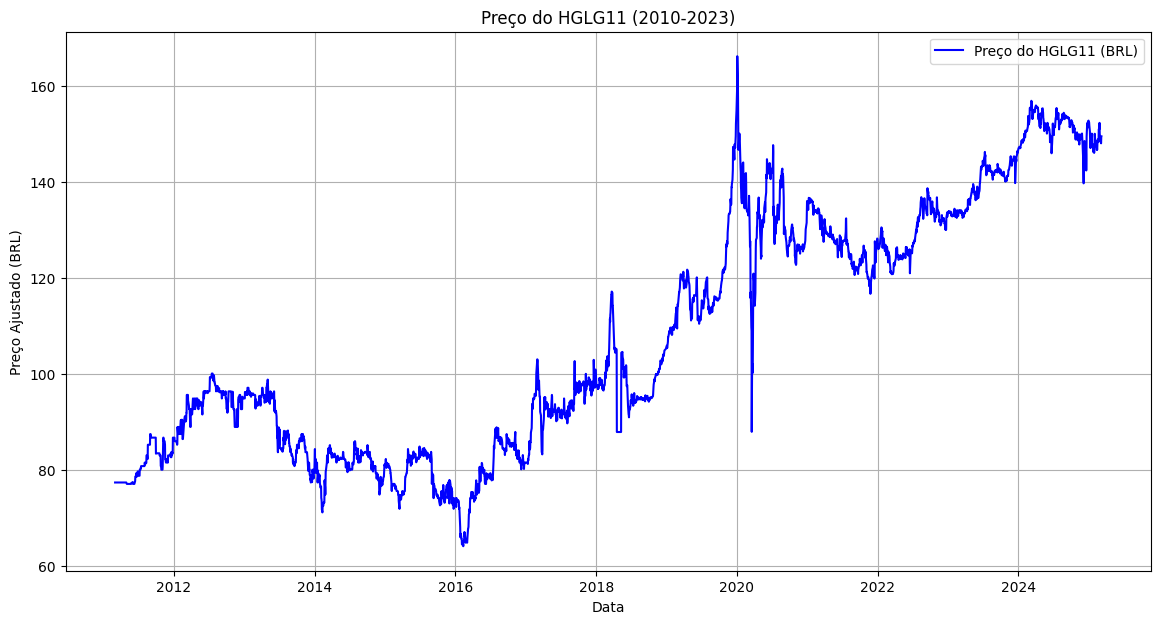

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(hglg11_data['Close'], label='Preço do HGLG11 (BRL)', color='blue')
plt.title('Preço do HGLG11 (2010-2023)')
plt.xlabel('Data')
plt.ylabel('Preço Ajustado (BRL)')
plt.legend()
plt.grid(True)
plt.show()

# 3.3. Retornos Diários
Calcule e visualize os retornos diários:

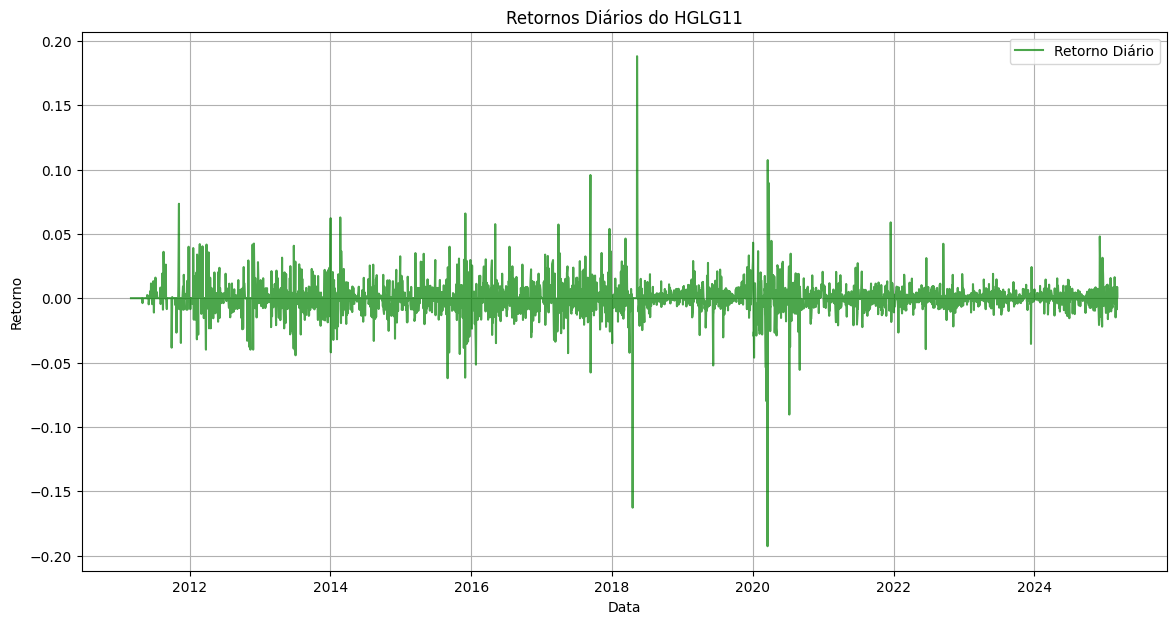

In [6]:
hglg11_data['Daily Return'] = hglg11_data['Close'].pct_change()

plt.figure(figsize=(14, 7))
plt.plot(hglg11_data['Daily Return'], label='Retorno Diário', color='green', alpha=0.7)
plt.title('Retornos Diários do HGLG11')
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True)
plt.show()

# 3.4. Distribuição dos Retornos
Analise a distribuição dos retornos diários:

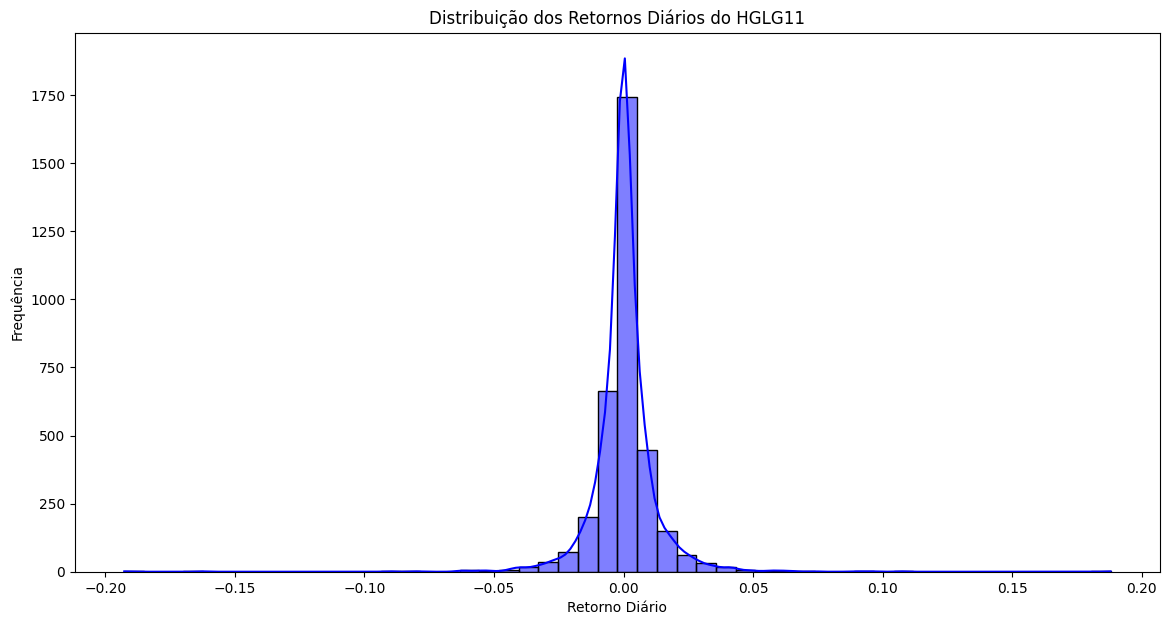

In [7]:
plt.figure(figsize=(14, 7))
sns.histplot(hglg11_data['Daily Return'].dropna(), bins=50, color='blue', kde=True)
plt.title('Distribuição dos Retornos Diários do HGLG11')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

# 4. Análise Quantitativa
# 4.1. Volatilidade
Calcule a volatilidade (desvio padrão dos retornos):

In [8]:
volatility = hglg11_data['Daily Return'].std()
print(f'Volatilidade Anualizada: {volatility * np.sqrt(252):.2%}')

Volatilidade Anualizada: 19.87%


# 4.2. Médias Móveis
Calcule e visualize médias móveis para identificar tendências:

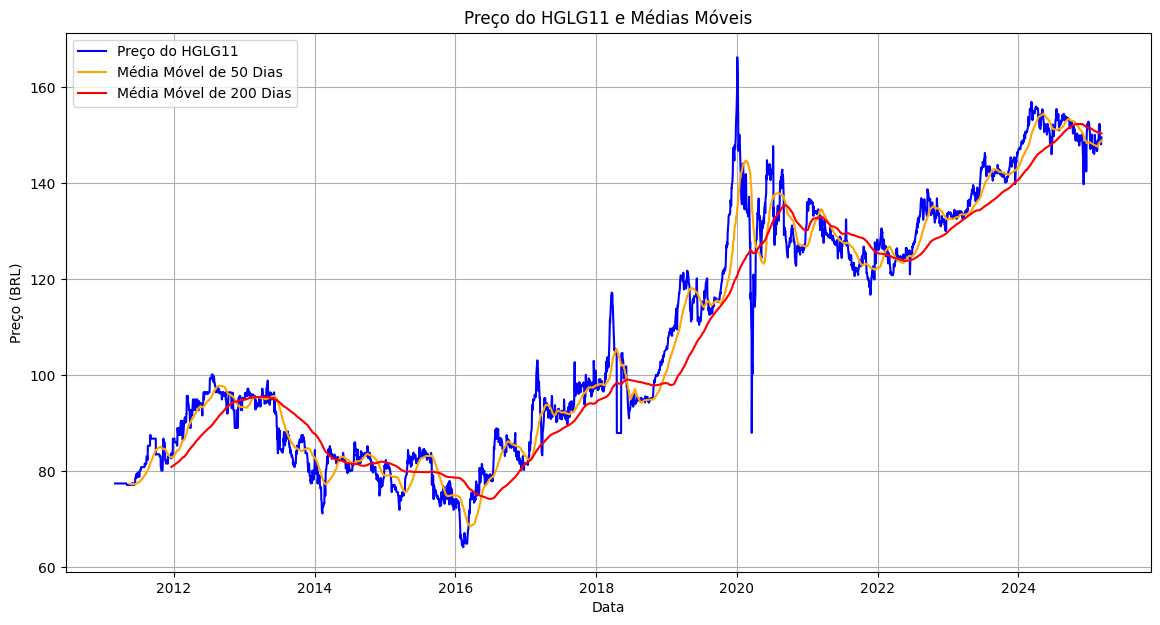

In [9]:
hglg11_data['50 Day MA'] = hglg11_data['Close'].rolling(window=50).mean()
hglg11_data['200 Day MA'] = hglg11_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(hglg11_data['Close'], label='Preço do HGLG11', color='blue')
plt.plot(hglg11_data['50 Day MA'], label='Média Móvel de 50 Dias', color='orange')
plt.plot(hglg11_data['200 Day MA'], label='Média Móvel de 200 Dias', color='red')
plt.title('Preço do HGLG11 e Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço (BRL)')
plt.legend()
plt.grid(True)
plt.show()

# 4.3. Correlação entre FIIs
Baixe dados de outros FIIs e calcule a correlação entre seus retornos:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


         HGLG11    MXRF11    KNRI11
HGLG11  1.00000  0.212810  0.272570
MXRF11  0.21281  1.000000  0.259911
KNRI11  0.27257  0.259911  1.000000


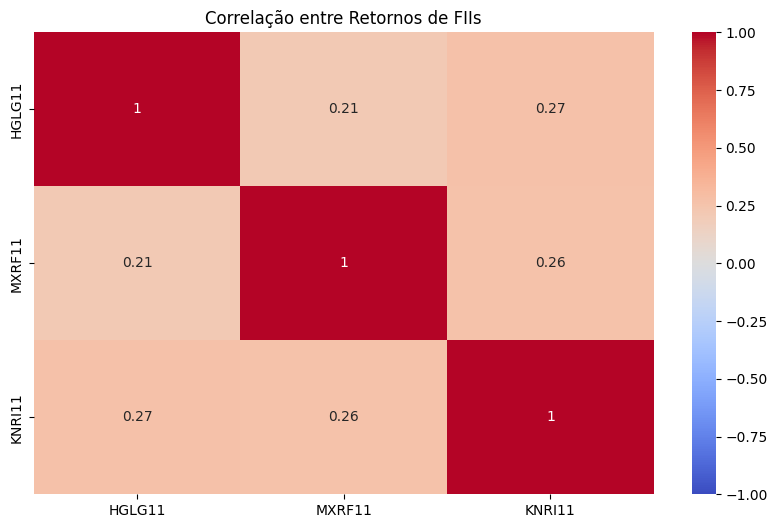

In [10]:
# Baixar dados de outros FIIs
mxrf11_data = yf.download('MXRF11.SA', start='2010-01-01', end='2023-10-01')
knri11_data = yf.download('KNRI11.SA', start='2010-01-01', end='2023-10-01')

# Calcular retornos diários
mxrf11_data['Daily Return'] = mxrf11_data['Close'].pct_change()
knri11_data['Daily Return'] = knri11_data['Close'].pct_change()

# Criar DataFrame de retornos
returns = pd.DataFrame({
    'HGLG11': hglg11_data['Daily Return'],
    'MXRF11': mxrf11_data['Daily Return'],
    'KNRI11': knri11_data['Daily Return']
}).dropna()

# Matriz de correlação
correlation_matrix = returns.corr()
print(correlation_matrix)

# Heatmap da correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Retornos de FIIs')
plt.show()

# 5. Modelagem e Previsão
# 5.1. Decomposição de Séries Temporais
Use a decomposição para separar tendência, sazonalidade e resíduos:

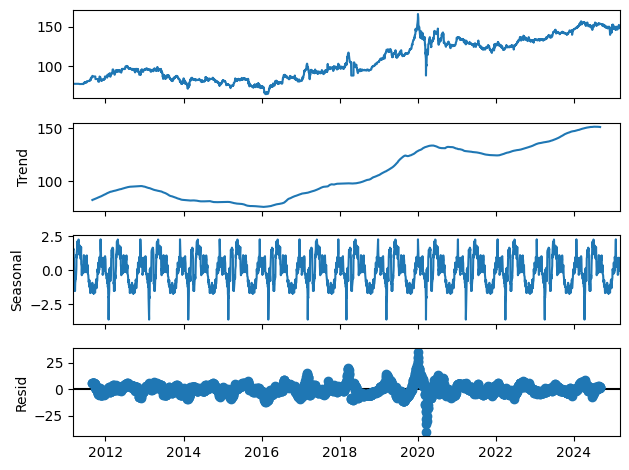

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(hglg11_data['Close'].dropna(), period=252)
decomposition.plot()
plt.show()

# 5.2. Modelo ARIMA
Ajuste um modelo ARIMA para prever preços futuros:

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              HGLG11.SA   No. Observations:                 3481
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5836.240
Date:                Fri, 07 Mar 2025   AIC                          11684.480
Time:                        13:51:30   BIC                          11721.408
Sample:                             0   HQIC                         11697.663
                               - 3481                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0222      0.007     -3.048      0.002      -0.037      -0.008
ar.L2          0.0337      0.008      4.113      0.000       0.018       0.050
ar.L3       8.811e-05      0.010      0.009      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


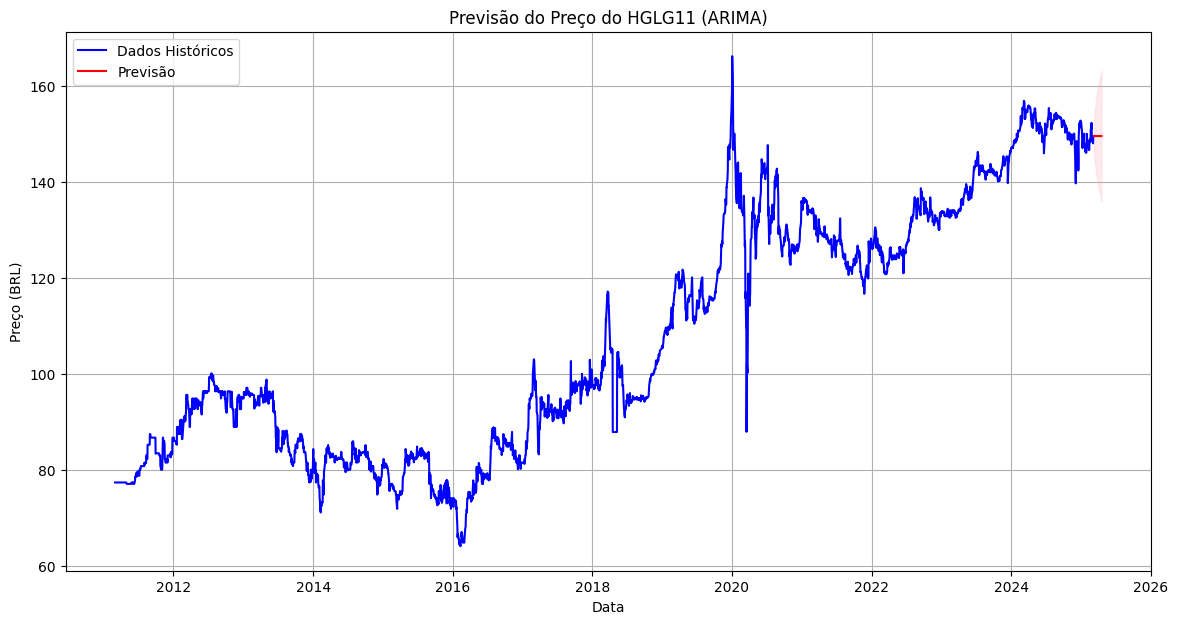

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar modelo ARIMA
model = ARIMA(hglg11_data['Close'].dropna(), order=(5, 1, 0))
results = model.fit()
print(results.summary())

# Previsão para os próximos 30 dias
forecast = results.get_forecast(steps=30)
forecast_index = pd.date_range(hglg11_data.index[-1], periods=31, freq='B')[1:]
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotar previsão
plt.figure(figsize=(14, 7))
plt.plot(hglg11_data['Close'], label='Dados Históricos', color='blue')
plt.plot(forecast_index, forecast_values, label='Previsão', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Previsão do Preço do HGLG11 (ARIMA)')
plt.xlabel('Data')
plt.ylabel('Preço (BRL)')
plt.legend()
plt.grid(True)
plt.show()

# 6. Estratégias de Trading
# 6.1. Crossover de Médias Móveis
Uma estratégia simples é comprar quando a média de curto prazo cruza acima da média de longo prazo e vender quando ocorre o contrário:

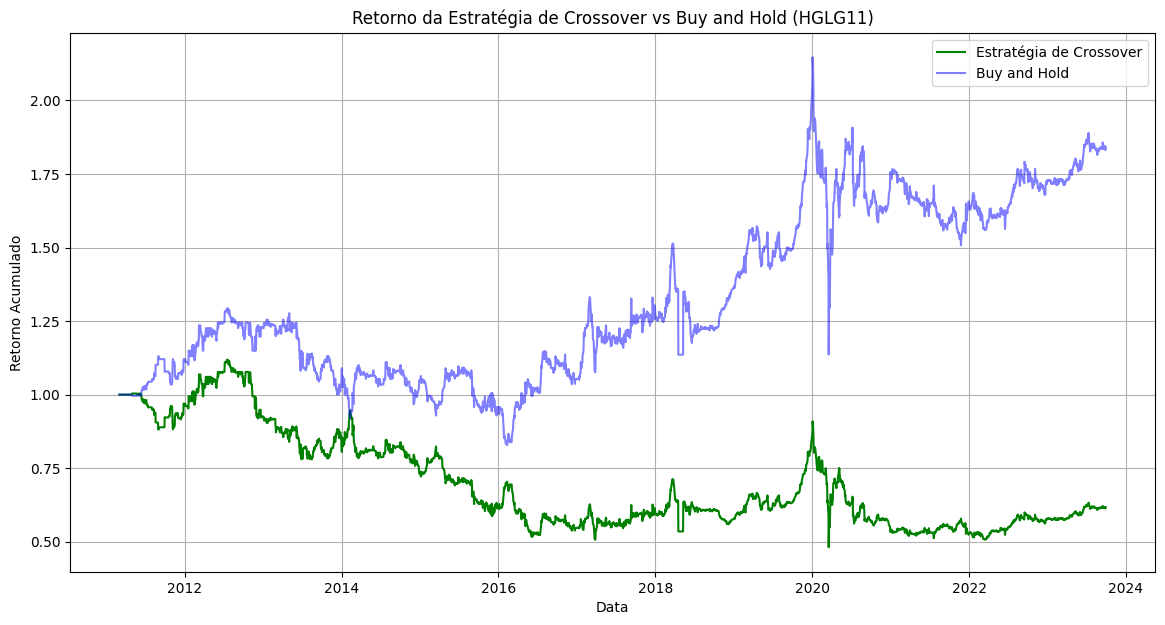

In [ ]:
hglg11_data['Signal'] = np.where(hglg11_data['50 Day MA'] > hglg11_data['200 Day MA'], 1, -1)
hglg11_data['Strategy Return'] = hglg11_data['Signal'].shift(1) * hglg11_data['Daily Return']

# Plotar retornos da estratégia
plt.figure(figsize=(14, 7))
plt.plot((1 + hglg11_data['Strategy Return']).cumprod(), label='Estratégia de Crossover', color='green')
plt.plot((1 + hglg11_data['Daily Return']).cumprod(), label='Buy and Hold', color='blue', alpha=0.5)
plt.title('Retorno da Estratégia de Crossover vs Buy and Hold (HGLG11)')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True)
plt.show()